In [8]:
import sys
sys.path.insert(0, '../../MultiOmic-NASA/tools/')

In [55]:
import utils as util
util.load()

import Abundence_analysis as Abundence_analysis
Abundence_analysis.load()

import pathlib as Path

data_path = Path.Path('../data/')
figs_path = Path.Path('../data/figures')

Loaded


In [12]:
simulation_df = util.make_simulation_df(10000)
display(simulation_df.sample(1))
abudence = Abundence_analysis.get_abudence(simulation_df, 'phenotype')
print(abudence)

,x,y,phenotype
3415,84782,24898,B


B    33.79
A    33.46
C    32.75
Name: phenotype, dtype: float64


In [13]:
import pandas as pd
# create sample input and annotation dataframes
input_df = pd.DataFrame({'x': ['12', '12', '221', '53'], 'phenotype': ['A', 'B', 'C', 'D']})
annotation_df = pd.DataFrame({'PHENO': ['A', 'B', 'C', 'D'], 'level': ['a', 'b', 'c', 'd']})
display((annotation_df.sample(2)))
# call the function to replace phenotype annotations with levels
output_df = util.change_annotation(input_df, 'phenotype', annotation_df, 'PHENO', 'level')

# print the output dataframe
print(output_df)

,PHENO,level
2,C,c
0,A,a


     x phenotype
0   12         a
1   12         b
2  221         c
3   53         d


In [17]:
import importlib
import pandas as pd
importlib.reload(util)
simulation_modified = util.generalize_infrequent_phenotypes(simulation_df, annotation_df, 'phenotype', 'PHENO', 'level', threshold=0.05)

In [61]:
importlib.reload(util)
util.make_simulation_files(dir_path = '../data/sim', num_files = 150, min_rows = 5, max_rows = 100)
coords_files = util.coords_to_df('../data/sim')

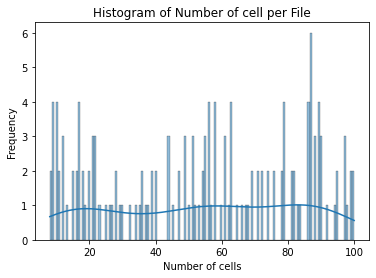

In [104]:
Abundence_analysis.QC_cell_count(coords_files, figs_path)



In [67]:
import os
import pandas as pd

# Define the directory path
in_path = data_path / 'sim'
out_path = Path.Path(data_path / 'ROIs' )

# Define the column name to filter on
column_name = 'ROIs'

importlib.reload(util)
util.split_DIR_roi( data_path/'sim', out_path = data_path/'ROIs' )



In [124]:
importlib.reload(Abundence_analysis)

<module 'Abundence_analysis' from '/home/mounim/CRCT-Projects/MultiOmic-NASA/example/../../MultiOmic-NASA/tools/Abundence_analysis.py'>

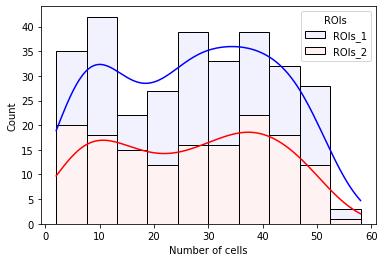

In [113]:
coords_files = util.coords_to_df('../data/sim')
Abundence_analysis.hist_compare_ROIs(coords_files, figs_path)

In [116]:
cell_count_by_ROIs = coords_files[['filename','phenotype','ROIs']].value_counts().reset_index()
cell_count_by_ROIs.sample()

,filename,phenotype,ROIs,0
273,simulated_99,A,ROIs_2,12


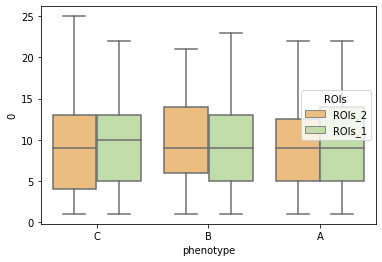

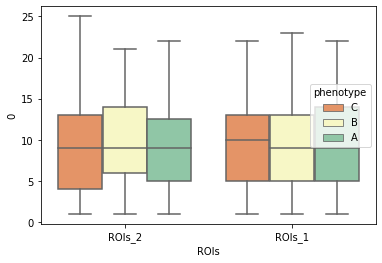

<Figure size 432x288 with 0 Axes>

In [125]:
Abundence_analysis.hist_phenotype(coords_files, figs_path)


# Stat test
Cat x Cat: Chi sq
Num: t-test
Num x Cat: t-test / ANOVA
Num x Num: Correlation

In [127]:
cell_count_by_ROIs.sample()

,filename,phenotype,ROIs,0
145,simulated_118,A,ROIs_1,15


In [167]:

importlib.reload(util)

cat_cols = [ 'ROIs', 'phenotype']
num_cols = [0, 0]
signif_table = util.test_category_numeric( cell_count_by_ROIs, cat_cols, num_cols).reset_index()
display(signif_table)

,level_0,level_1,test_statistic,p_value
0,ROIs,0,-0.008196,0.993462
1,phenotype,0,0.078722,0.924304


In [177]:
signif_data

,level_0,level_1,test_statistic,p_value
0,ROIs,0,-0.008196,0.993462
1,phenotype,0,0.078722,0.924304


In [191]:

threshold = 0.05
threshold = 1
import seaborn as sns
# Filter the significant p-values
plot = 'box'

importlib.reload(util)
util.plot_signif_cat_num(cell_count_by_ROIs, signif_table)
